In [1]:
import math, scipy
import numpy as np
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
pip install openpyxl

Note: you may need to restart the kernel to use updated packages.


In [3]:
pd.read_excel('./UN.xlsx', sheet_name="Table 3")

Unnamed: 0                 Unnamed: 1 Unnamed: 2 Unnamed: 3  \
0          NaN                        NaN        NaN        NaN   
1          NaN                        NaN        NaN        NaN   
2          NaN                        NaN        NaN        NaN   
3          NaN                        NaN        NaN        NaN   
4          NaN                        NaN        NaN        NaN   
..         ...                        ...        ...        ...   
275        261                      Samoa        NaN        882   
276        262                    Tokelau        NaN        772   
277        263                      Tonga        NaN        776   
278        264                     Tuvalu        NaN        798   
279        265  Wallis and Futuna Islands        NaN        876   

              Unnamed: 4 Unnamed: 5 Unnamed: 6 Unnamed: 7 Unnamed: 8  \
0                    NaN        NaN        NaN        NaN        NaN   
1                    NaN        NaN        NaN        NaN        NaN   
2                    NaN        NaN        NaN        NaN        NaN   
3         United Nations        NaN        NaN        NaN        NaN   
4    Population Division        NaN        NaN        NaN        NaN   
..                   ...        ...        ...        ...        ...   
275                    B   2.061216   2.758613   3.435005     3.1935   
276                    B  16.780609       17.5  16.881443  21.322314   
277                    B   3.059316   3.414365     3.7631   4.264411   
278                    C   3.531764   2.850331   2.303854   1.887766   
279                    B  10.100865  11.878668  13.899427  16.601151   

     Unnamed: 9  ...  Unnamed: 13 Unnamed: 14 Unnamed: 15 Unnamed: 16  \
0           NaN  ...          NaN         NaN         NaN         NaN   
1           NaN  ...          NaN         NaN         NaN         NaN   
2           NaN  ...          NaN         NaN         NaN         NaN   
3           NaN  ...          NaN         NaN         NaN         NaN   
4           NaN  ...          NaN         NaN         NaN         NaN   
..          ...  ...          ...         ...         ...         ...   
275    2.753334  ...     3.410241    3.155014    2.703491    2.477821   
276   37.797357  ...           ..          ..          ..          ..   
277    4.831308  ...      3.97887    4.603156     5.23869    5.873514   
278    1.567111  ...           ..          ..          ..          ..   
279   20.464431  ...           ..          ..          ..          ..   

    Unnamed: 17 Unnamed: 18 Unnamed: 19 Unnamed: 20 Unnamed: 21 Unnamed: 22  
0           NaN         NaN         NaN         NaN         NaN         NaN  
1           NaN         NaN         NaN         NaN         NaN         NaN  
2           NaN         NaN         NaN         NaN         NaN         NaN  
3           NaN         NaN         NaN         NaN         NaN         NaN  
4           NaN         NaN         NaN         NaN         NaN         NaN  
..          ...         ...         ...         ...         ...         ...  
275    2.037094    2.746419    3.461915    3.234843    2.806425    2.628654  
276          ..          ..          ..          ..          ..          ..  
277    3.033792     3.29138    3.539805    3.923713    4.422647    4.919612  
278          ..          ..          ..          ..          ..          ..  
279          ..          ..          ..          ..          ..          ..  

[280 rows x 23 columns]

In [4]:
#import original messy Table 3 and delete extra rows without data
#Total means sum of female+male data
col_names = ['Sort Order','Major Area, Region, Country or Area of Destination','Notes','Country Code','Type of Data','1990 Total',
             '1995 Total', '2000 Total','2005 Total', '2010 Total', '2015 Total','1990 Male', '1995 Male', '2000 Male'
             ,'2005 Male', '2010 Male','2015 Male','1990 Female', '1995 Female', '2000 Female','2005 Female',
             '2010 Female','2015 Female']
df2=pd.read_excel('UN.xlsx', sheet_name= 'Table 3',skiprows=16,header=None,usecols=list(range(1,23)),names=col_names)
df2.head()

Major Area, Region, Country or Area of Destination Notes  Country Code  \
0                                              WORLD   NaN           900   
1                                  Developed regions   (b)           901   
2                                 Developing regions   (c)           902   
3                          Least developed countries   (d)           941   
4  Less developed regions excluding least develop...   NaN           934   

  Type of Data 1990 Total 1995 Total 2000 Total 2005 Total  2010 Total  \
0          NaN    2.87331   2.803806   2.818899   2.933739    3.199467   
1          NaN   7.198015   7.891085   8.695688   9.693045   10.747765   
2          NaN   1.685021   1.500317   1.404022   1.395066    1.565106   
3          NaN   2.171513   2.001353   1.516863   1.303078    1.182422   
4          NaN   1.617042   1.426534   1.386338   1.410133    1.631865   

   2015 Total  ... 2000 Male 2005 Male  2010 Male  2015 Male 1990 Female  \
0    3.315888  ...  2.849206  2.979124   3.280341     3.4019     2.83474   
1   11.226422  ...  8.743236   9.73154  10.680972  11.097807    7.147777   
2    1.692624  ...  1.490031  1.507122   1.746117   1.888268    1.595116   
3    1.252551  ...  1.617552  1.432574   1.293264    1.35773    2.045276   
4    1.774158  ...  1.470597  1.519189   1.823509   1.984593    1.530877   

  1995 Female 2000 Female 2005 Female 2010 Female 2015 Female  
0    2.775658    2.788169    2.887645    3.117222    3.228342  
1     7.84948    8.650694    9.656595   10.811029   11.348476  
2    1.417459    1.315351    1.279428    1.378176     1.49061  
3    1.901226    1.418405    1.175548    1.073428    1.148865  
4    1.344872    1.299002    1.296941    1.432634    1.555397  

[5 rows x 22 columns]

In [5]:
#make new columns for year, male female, total, and International migrant stock as a percentage
#of the total population by sex and by major area, region, country or area, 1990-2015 values

df3=pd.melt(df2,id_vars=['Major Area, Region, Country or Area of Destination',
                         'Notes','Country Code','Type of Data'],value_name='International Migrant Stock as a Percentage of the Total Population')
df3.head(5)

Major Area, Region, Country or Area of Destination Notes  Country Code  \
0                                              WORLD   NaN           900   
1                                  Developed regions   (b)           901   
2                                 Developing regions   (c)           902   
3                          Least developed countries   (d)           941   
4  Less developed regions excluding least develop...   NaN           934   

  Type of Data    variable  \
0          NaN  1990 Total   
1          NaN  1990 Total   
2          NaN  1990 Total   
3          NaN  1990 Total   
4          NaN  1990 Total   

  International Migrant Stock as a Percentage of the Total Population  
0                                            2.87331                   
1                                           7.198015                   
2                                           1.685021                   
3                                           2.171513                   
4                                           1.617042

In [6]:
#make new year column
df3['Year'] = df3['variable'].str[0:4]
df3['Year'].head(10)

0    1990
1    1990
2    1990
3    1990
4    1990
5    1990
6    1990
7    1990
8    1990
9    1990
Name: Year, dtype: object

In [7]:
#make new column for male+female+and total
df3['combo'] = df3['variable'].str[5:]
df3['combo'].head(10)

0    Total
1    Total
2    Total
3    Total
4    Total
5    Total
6    Total
7    Total
8    Total
9    Total
Name: combo, dtype: object

In [8]:
df3.head(50)

Major Area, Region, Country or Area of Destination Notes  Country Code  \
0                                               WORLD   NaN           900   
1                                   Developed regions   (b)           901   
2                                  Developing regions   (c)           902   
3                           Least developed countries   (d)           941   
4   Less developed regions excluding least develop...   NaN           934   
5                                  Sub-Saharan Africa   (e)           947   
6                                              Africa   NaN           903   
7                                      Eastern Africa   NaN           910   
8                                             Burundi   NaN           108   
9                                             Comoros   NaN           174   
10                                           Djibouti   NaN           262   
11                                            Eritrea   NaN           232   
12                                           Ethiopia   NaN           231   
13                                              Kenya   NaN           404   
14                                         Madagascar   NaN           450   
15                                             Malawi   NaN           454   
16                                          Mauritius   (1)           480   
17                                            Mayotte   NaN           175   
18                                         Mozambique   NaN           508   
19                                            Réunion   NaN           638   
20                                             Rwanda   NaN           646   
21                                         Seychelles   NaN           690   
22                                            Somalia   NaN           706   
23                                        South Sudan   NaN           728   
24                                             Uganda   NaN           800   
25                        United Republic of Tanzania   (2)           834   
26                                             Zambia   NaN           894   
27                                           Zimbabwe   NaN           716   
28                                      Middle Africa   NaN           911   
29                                             Angola   NaN            24   
30                                           Cameroon   NaN           120   
31                           Central African Republic   NaN           140   
32                                               Chad   NaN           148   
33                                              Congo   NaN           178   
34                   Democratic Republic of the Congo   NaN           180   
35                                  Equatorial Guinea   NaN           226   
36                                              Gabon   NaN           266   
37                              Sao Tome and Principe   NaN           678   
38                                    Northern Africa   NaN           912   
39                                            Algeria   NaN            12   
40                                              Egypt   NaN           818   
41                                              Libya   NaN           434   
42                                            Morocco   NaN           504   
43                                              Sudan   (3)           729   
44                                            Tunisia   NaN           788   
45                                     Western Sahara   NaN           732   
46                                    Southern Africa   NaN           913   
47                                           Botswana   NaN            72   
48                                            Lesotho   NaN           426   
49                                            Namibia   NaN           516   

   Type of Data    variable  \
0           NaN  1990 Total   
1           N

In [9]:
#Final cleaned table

pivot_table= pd.pivot(df3,index=['Major Area, Region, Country or Area of Destination','Notes','Country Code',
'Type of Data','Year'],columns='combo',values='International Migrant Stock as a Percentage of the Total Population').reset_index().rename_axis(None,axis=1)

pivot_table.rename(columns={'Total': 'Total',
                            'Male': 'Male',
                            'Female': 'Female'}
                   , inplace=True)

pivot_table.head(10)

Major Area, Region, Country or Area of Destination Notes  Country Code  \
0                                        Afghanistan   NaN             4   
1                                        Afghanistan   NaN             4   
2                                        Afghanistan   NaN             4   
3                                        Afghanistan   NaN             4   
4                                        Afghanistan   NaN             4   
5                                        Afghanistan   NaN             4   
6                                             Africa   NaN           903   
7                                             Africa   NaN           903   
8                                             Africa   NaN           903   
9                                             Africa   NaN           903   

  Type of Data  Year    Female      Male     Total  
0            B  1990  0.426785  0.526843  0.478025  
1            B  1995  0.400701  0.450392  0.426424  
2            B  2000  0.346076  0.422292  0.385328  
3            B  2005  0.322702  0.390557  0.357788  
4            B  2010  0.327609   0.40166  0.365658  
5            B  2015  1.199274  1.153263  1.175547  
6          NaN  1990  2.341249  2.627838   2.48421  
7          NaN  1995  2.142859  2.397529  2.269911  
8          NaN  2000  1.703378  1.933132  1.818078  
9          NaN  2005  1.510851  1.791037  1.650783

In [10]:
#change data type of year
pivot_table["Year"].astype(int)

0       1990
1       1995
2       2000
3       2005
4       2010
        ... 
1585    1995
1586    2000
1587    2005
1588    2010
1589    2015
Name: Year, Length: 1590, dtype: int64

In [11]:

pivot_table['Year']=pivot_table["Year"].astype(int)

In [12]:
import matplotlib.pyplot as plt

In [13]:
#select data by developed vs developing
df_by_development = pivot_table[pivot_table['Country Code'].isin([901,902])]

In [14]:
pivot_table=pivot_table[pivot_table['Total']!='..']

In [15]:
final_table =pivot_table[pivot_table['Country Code'] < 900]

In [16]:
list(final_table['Female'].unique())[-10:]

[2.9569765329273254,
 2.0541604622241456,
 1.0590003198708016,
 0.7810059471897435,
 5.218774392409414,
 3.151235626551679,
 2.8056412181079606,
 2.576639615893271,
 2.417985019085819,
 2.166554603715335]

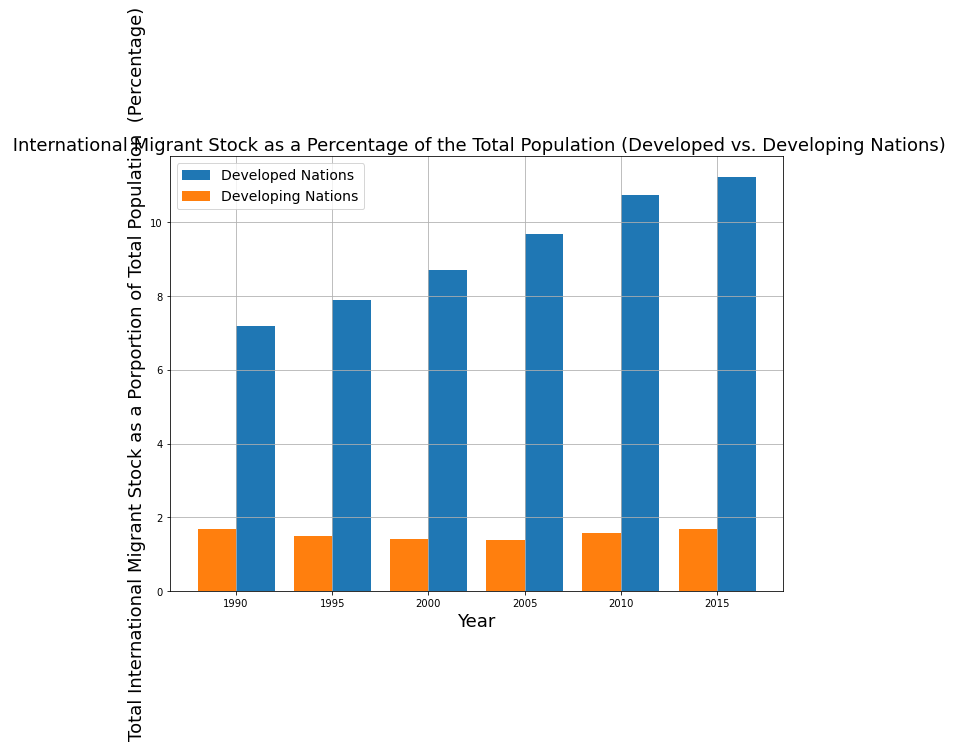

In [17]:
#create developed vs. developing nations graphs
# create a figure and axis
fig, ax = plt.subplots()

# scatter male against female
x = df_by_development['Year'][:6].astype(int)
y1 = df_by_development[df_by_development['Country Code']==901]['Total'].values
y2 = df_by_development[df_by_development['Country Code']==902]['Total'].values
w = 1
rects1 = ax.bar(x+w, y1, width = 2, color='tab:blue', align='center')
rects2 = ax.bar(x-w, y2,  width = 2, color='tab:orange', align='center')
fig.set_size_inches(11, 8)

#ax.xaxis_date()
#ax.autoscale(tight=True)

# set a title and labels
ax.grid(True)
ax.set_title(' International Migrant Stock as a Percentage of the Total Population (Developed vs. Developing Nations)', fontsize=18)
ax.set_xlabel('Year', fontsize=18)
ax.set_ylabel('Total International Migrant Stock as a Porportion of Total Population  (Percentage)', fontsize=18)
ax.legend( (rects1[0], rects2[0]), ('Developed Nations', 'Developing Nations'), fontsize=14 )

In [18]:
#select data by region
df_by_region =pivot_table[pivot_table['Country Code'].isin([903,935,908,909,904, 905])]

In [ ]:
#Create continent graph
# create a figure and axis
fig, ax = plt.subplots()
fig.set_size_inches(18.5, 10.5)

# scatter male against female
x = df_by_region['Year'][:6].astype(int)
#903,935,908,909,904, 905
y_africa = df_by_region[df_by_region['Country Code']==903]['Total'].values
y_asia = df_by_region[df_by_region['Country Code']==935]['Total'].values
y_europe = df_by_region[df_by_region['Country Code']==908]['Total'].values
y_oceanian = df_by_region[df_by_region['Country Code']==909]['Total'].values
y_latin = df_by_region[df_by_region['Country Code']==904]['Total'].values
y_north_america = df_by_region[df_by_region['Country Code']==905]['Total'].values
w = 0.7
rects1 = ax.bar(x-2*w, y_africa, width = 0.5, color='tab:green', align='center')
rects2 = ax.bar(x-w, y_asia,  width = 0.5, color='tab:purple', align='center')
rects3 = ax.bar(x, y_europe, width = 0.5, color='tab:brown', align='center')
rects4 = ax.bar(x+1*w, y_oceanian,  width = 0.5, color='tab:olive', align='center')
rects5 = ax.bar(x+2*w, y_latin, width = 0.5, color='tab:cyan', align='center')
rects6 = ax.bar(x+3*w, y_north_america,  width = 0.5, color='tab:pink', align='center')

#ax.xaxis_date()
#ax.autoscale(tight=True)

# set a title and labels
fig.set_size_inches(16, 14)
ax.grid(True)
ax.set_title('International Migrant Stock as a Porportion of Total Population by Continent (Percentage)',fontsize=20)
ax.set_xlabel('Year',fontsize=18)
ax.set_ylabel('Total International Migrant Stock as a Porportion of Total Population',fontsize=18)
ax.legend( (rects1[0], rects2[0],rects3[0],rects4[0],rects5[0],rects6[0]), 
          ('Africa', 'Asia','Europe','Oceania', 'Latin America', 'North America'),fontsize=12 )

In [20]:
#create histograms
table_1990=pivot_table[pivot_table['Year']==1990]
table_1995=pivot_table[pivot_table['Year']==1995]
table_2000=pivot_table[pivot_table['Year']==2000]  
table_2005=pivot_table[pivot_table['Year']==2005]
table_2010=pivot_table[pivot_table['Year']==2010]

In [21]:
pivot_table["Year"]

0       1990
1       1995
2       2000
3       2005
4       2010
        ... 
1585    1995
1586    2000
1587    2005
1588    2010
1589    2015
Name: Year, Length: 1571, dtype: int64

In [22]:
table_1990

Major Area, Region, Country or Area of Destination Notes  Country Code  \
0                                           Afghanistan   NaN             4   
6                                                Africa   NaN           903   
12                                              Albania   NaN             8   
18                                              Algeria   NaN            12   
24                                       American Samoa   NaN            16   
...                                                 ...   ...           ...   
1560                                     Western Europe   NaN           926   
1566                                     Western Sahara   NaN           732   
1572                                              Yemen   NaN           887   
1578                                             Zambia   NaN           894   
1584                                           Zimbabwe   NaN           716   

     Type of Data  Year    Female      Male      Total  
0               B  1990  0.426785  0.526843   0.478025  
6             NaN  1990  2.341249  2.627838    2.48421  
12              B  1990  2.213497  1.819488     2.0117  
18            C R  1990  0.966931  1.145317   1.057233  
24              B  1990        ..        ..  45.240626  
...           ...   ...       ...       ...        ...  
1560          NaN  1990  8.579175  9.949418   9.246246  
1566            I  1990  1.185284  1.289091   1.239692  
1572          C R  1990  0.858897  1.131174   0.993746  
1578          B R  1990  3.319245  3.535582   3.426552  
1584          B R  1990  5.218774  6.744735   5.978395  

[260 rows x 8 columns]

Text(0, 0.5, 'Count')

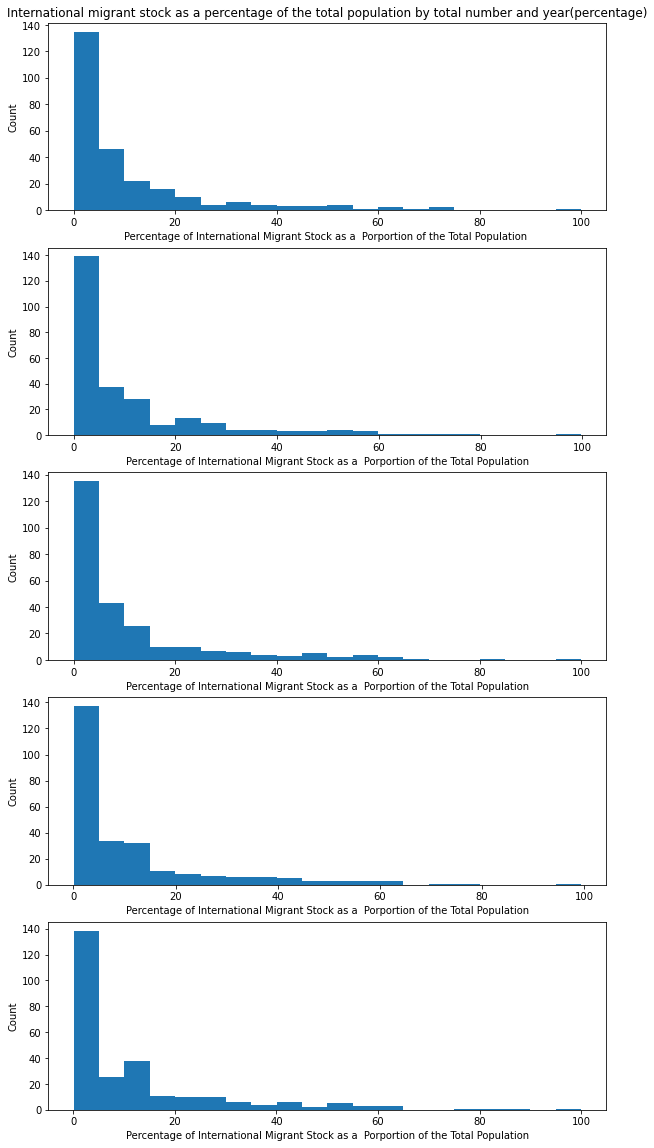

In [23]:
fig, arr = plt.subplots(5, 1, figsize=(10, 20))

arr[0].hist(table_1990['Total'],bins=20)

arr[1].hist(table_1995['Total'],bins=20)

arr[2].hist(table_2000['Total'],bins=20)

arr[3].hist(table_2005['Total'],bins=20)

arr[4].hist(table_2010['Total'],bins=20)


# set a title and labels
arr[0].set_title('International migrant stock as a percentage of the total population by total number and year(percentage)')
arr[0].set_xlabel('Percentage of International Migrant Stock as a  Porportion of the Total Population ')
arr[1].set_xlabel('Percentage of International Migrant Stock as a  Porportion of the Total Population')
arr[2].set_xlabel('Percentage of International Migrant Stock as a  Porportion of the Total Population')
arr[3].set_xlabel('Percentage of International Migrant Stock as a  Porportion of the Total Population')
arr[4].set_xlabel('Percentage of International Migrant Stock as a  Porportion of the Total Population')
arr[0].set_ylabel('Count')
arr[1].set_ylabel('Count')
arr[2].set_ylabel('Count')
arr[3].set_ylabel('Count')
arr[4].set_ylabel('Count')
